In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json

In [2]:
#file path
#Import clean csv file
project_df_path = "Data/merge.csv"
project_df = pd.read_csv(project_df_path)
project_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP,Country & Year_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892,2019Finland
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745,2019Denmark
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184,2019Norway
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465,2019Netherlands
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077,2019Switzerland


In [3]:
#see dataframe column as a list
#project_df.columns.tolist()

In [4]:
#number of participating countries
project_df["Country or region_HS"].unique()

In [ ]:
#suppress warning
import warnings
warnings.simplefilter("ignore")

In [5]:
#Get ranking and totals data
totals_df = project_df[['Year_HS', 'Country_SP', 'Overall rank_HS', 'Score_HS', 'SPI Rank_SP',  'Social Progress Index_SP']]

#Rename year and country columns
totals_df.rename(columns = {"Year_HS":"Year", "Country_SP":"Country"}, inplace = True)

#configure SPI ranking to not have a decimal
totals_df["SPI Rank_SP"] = totals_df["SPI Rank_SP"].astype(int)

#renaming columns to get rid of spaces
totals_df.rename(columns={"Overall rank_HS":"Rank_HS"}, inplace=True)
totals_df.rename(columns={"SPI Rank_SP":"Rank_SPI"}, inplace=True)

In [6]:
#Top Rankings of Happiness Score
#ranking_HS = totals_df.sort_values(["Year","Rank_HS"])
#ranking_HS

In [7]:
#Top Rankings of Social Progress Index
#ranking_SP = totals_df.sort_values(["Year","Rank_SPI"])
#ranking_SP

In [8]:
ranking_both_top10 = totals_df[(totals_df["Rank_HS"] <= 10) & (totals_df["Rank_SPI"] <= 10)]
#use \ (vertical bar for either condiation)
ranking_both_top10

,Year,Country,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
0,2019,Finland,1,7.769,4,91.94
1,2019,Denmark,2,7.600,2,92.08
2,2019,Norway,3,7.554,1,93.08
3,2019,Netherlands,5,7.488,10,91.16
4,2019,Switzerland,6,7.480,6,91.52
5,2019,Sweden,7,7.343,7,91.32
6,2019,New Zealand,8,7.307,5,91.62
7,2019,Canada,9,7.278,8,91.26
76,2018,Finland,1,7.632,4,91.82
77,2018,Norway,2,7.594,1,92.87


In [9]:
ranking_HS = ranking_both_top10.sort_values(["Rank_HS"])

,Year,Country,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
0,2019,Finland,1,7.769,4,91.94
1,2019,Denmark,2,7.600,2,92.08
2,2019,Norway,3,7.554,1,93.08
3,2019,Netherlands,5,7.488,10,91.16
4,2019,Switzerland,6,7.480,6,91.52
...,...,...,...,...,...,...
308,2015,Austria,13,7.200,15,88.85
310,2015,United States,15,7.119,22,86.58
312,2015,Ireland,18,6.940,13,89.15
313,2015,Belgium,19,6.937,12,89.39


In [ ]:
ranking_SPI = ranking_both_top10.sort_values(["Rank_SPI"])
#ranking_SPI

In [ ]:
ranking_country = ranking_both_top10.sort_values(["Country"])
ranking_country

In [ ]:
ranking_top10 = ranking_both_top10.groupby(["Country","Rank_HS","Rank_SPI"])
ranking_top10.count()

In [ ]:
count10 = ranking_top10["Rank_SPI"].count()
count10

In [ ]:
#Scatterplot all years 
x_values = ranking_both_top10["Rank_HS"]
y_values = ranking_both_top10["Rank_SPI"]

In [ ]:
plt.title("Top 10 Social Progress and Happiness Rankings (2015-2019)")
plt.ylabel(" Social Progress Rank")
plt.xlabel("Happiness Rank")
plt.ylim(0,11)
plt.xlim(0,11)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

plt.scatter(x_values, y_values, color="black", marker="o")
plt.show()


In [ ]:
#plot_country = ranking_country["Country"].to_list()
#plot_HS_rank = ranking_country["Rank_HS"].to_list()
#plot_SPI_rank = ranking_country["Rank_SPI"].to_list()
#plot_HS_rank
#plot_SPI_rank
#plot_country

In [ ]:
#Create variable for list of ranking data
plot_HS_rank = ranking_country["Rank_HS"].to_list()

plot_SPI_rank = ranking_country["Rank_SPI"].to_list()

country = ranking_country["Country"].to_list()


In [ ]:
#Create variable to add and inverse the rankings so the smallest number for the ranking displays a larger dot using list comprehension.
#https://www.geeksforgeeks.org/python-adding-two-list-elements/
#display_dot = [plot_HS_rank[i] + plot_SPI_rank[i] for i in range(len(plot_HS_rank))]

display_dot = [float(plot_HS_rank[i]) + float(plot_SPI_rank[i]) for i in range(len(plot_HS_rank))]

#Find reciprocal
#https://www.geeksforgeeks.org/numpy-reciprocal
display_dot_inv = np.reciprocal(display_dot)

#display_dot
#display_dot_inv

In [ ]:
#Scatterplot of the two rankings with cities that rank 1-10 in both.
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
#https://python-graph-gallery.com/270-basic-bubble-plot/

df = pd.DataFrame(dict(plot_HS_rank=plot_HS_rank, plot_SPI_rank=plot_SPI_rank, country=country, display_dot_inv=display_dot_inv))
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7,7)

colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}
scatter = ax.scatter(df['plot_HS_rank'], df['plot_SPI_rank'], s=df['display_dot_inv']*2500, c=df['country'].apply(lambda x: colors[x]))
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Countries")

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#plt.savefig("Data/TopTenRanking.png")
plt.show()

In [ ]:
groups = ranking_country.groupby("Country")
colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}

for name, group in groups:
    plt.plot(group["Rank_HS"], group["Rank_SPI"], marker="o", markersize=20, linestyle="", label=name,)

plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["legend.markerscale"] = 0.4

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.legend()

#plt.savefig("Data/TopTenRanking-alternate.png")
plt.show()

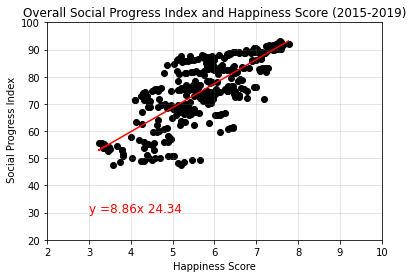

R squared: 0.5932533292668125


In [10]:
#Scatterplot all years 
x_values = totals_df["Score_HS"]
y_values = totals_df["Social Progress Index_SP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (7,7)

plt.title("Social Progress Index and Happiness Scores \n for All Countries (2015-2019)",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_scatter.png")

plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

In [11]:
#Group by country
grouped_totals_df = totals_df.groupby(["Country"])
grouped_totals_df.mean()

,Year,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
Country,,,,,
Albania,2017.0,106.400000,4.712600,51.800000,75.192000
Argentina,2017.0,31.200000,6.459400,42.000000,79.426000
Armenia,2017.0,122.800000,4.393200,59.200000,73.300000
Australia,2018.0,10.333333,7.261333,8.333333,91.133333
Austria,2017.0,12.000000,7.142000,15.400000,89.072000
...,...,...,...,...,...
Turkey,2017.0,75.200000,5.415400,85.000000,68.120000
Ukraine,2017.0,127.400000,4.307200,66.400000,71.730000
United Kingdom,2017.0,17.800000,6.910000,18.200000,88.770000


In [12]:
#Converting groupby to a dataframe
averages_df = pd.DataFrame(grouped_totals_df["Rank_HS", "Score_HS", "Rank_SPI", "Social Progress Index_SP"].mean())

In [ ]:
#Scatterplot averaged data 
x_values = averages_df["Score_HS"]
y_values = averages_df["Social Progress Index_SP"]

plt.rcParams["figure.figsize"] = (7,7)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title("5-year Average Social Progress Index \n and Happiness Score for Each Country",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_5average_scatter.png")

plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

# Analysis of Relationships between Social Progress Indicators and Happiness Score

### Basic Human Needs vs. Happiness Linear Regression

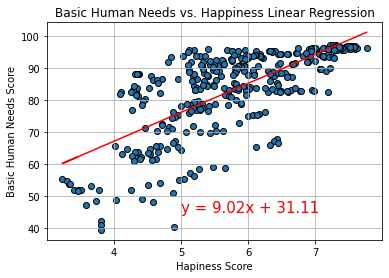

In [14]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Basic Human Needs_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Labels
plt.title('Basic Human Needs vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Basic Human Needs Score')
plt.grid()
plt.show()

In [15]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7203380281808829.  This is a strong positive relationship


### Foundations of Wellbeing vs Happiness Linear Regression

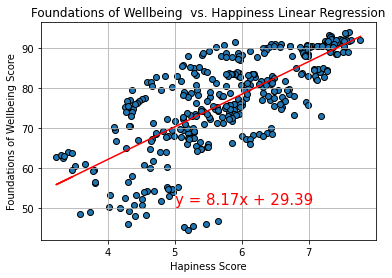

In [16]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Foundations of Wellbeing_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,51),fontsize=15,color="red")

# Labels
plt.title('Foundations of Wellbeing  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [17]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7375901602991619.  This is a strong positive relationship


### Opportunity vs. Happiness Linear Regression

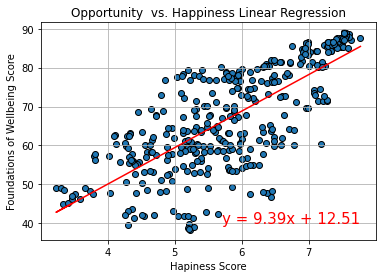

In [18]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Opportunity_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.7,40),fontsize=15,color="red")

# Labels
plt.title('Opportunity  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [19]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7422322467871909.  This is a strong positive relationship


# Finding Sub-metric with Strongest Correlation to Happiness Score

In [41]:
# Create lists for storage of information
sub_metric_list = []
pos_rvalue_list = []

# Select only columns relating to Social Progress Indicators
submetric_df = project_df.iloc[:, 22:84]

# Iterate through the submetric data frame and store rvalues and submetric label for each
for column in submetric_df:
    submetric_string = column[:-3]
    x_values = project_df['Score_HS']
    y_values = project_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    sub_metric_list.append(submetric_string)
    rvalue_list.append(rvalue)
    
# Store lists in a dictionary
submetric_results_dict = {
    'Sub Metric' : sub_metric_list,
    'R Value' : rvalue_list
}

# Create a dataframe with the dictionary
submetric_results_df = pd.DataFrame(data = submetric_results_dict)

,Sub Metric,R Value
22,Household air pollution attributable deaths (d...,-0.757515
19,Populations using unsafe or unimproved sanitat...,-0.711743
49,Vulnerable employment (% of employees),-0.672860
18,Populations using unsafe or unimproved water s...,-0.664992
14,Child stunting (% of children),-0.655595


### Positive Relationship Results

In [44]:
positive_results_df = submetric_results_df.loc[submetric_results_df['R Value'] >= 0]
weak_pos_results_df = positive_results_df.sort_values(by=['R Value'])
strong_pos_results_df = positive_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Positive Indicators of Happiness</b>

In [45]:
strong_pos_results_df.head()

,Sub Metric,R Value
39,Life expectancy at 60 (years),0.774387
5,Access to Information and Communications,0.759601
6,Health and Wellness,0.754358
57,Acceptance of gays and lesbians (0=low; 100=high),0.753401
9,Personal Freedom and Choice,0.746031


<b>Weakest Positive Indicators of Happiness</b>

In [46]:
weak_pos_results_df.head()

,Sub Metric,R Value
40,Greenhouse gas emissions (total CO2 equivalents),0.119274
42,Biome protection,0.215574
58,Quality weighted universities (points),0.282349
46,Freedom of religion (0=no freedom; 4=full free...,0.324060
35,Mobile telephone subscriptions (subscriptions/...,0.336811


### Negative Relationship Results

In [49]:
negative_results_df = submetric_results_df.loc[submetric_results_df['R Value'] < 0]
strong_neg_results_df = negative_results_df.sort_values(by=['R Value'])
weak_neg_results_df = negative_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Negative Indicators of Happiness</b>

In [50]:
strong_neg_results_df.head()

,Sub Metric,R Value
22,Household air pollution attributable deaths (d...,-0.757515
19,Populations using unsafe or unimproved sanitat...,-0.711743
49,Vulnerable employment (% of employees),-0.672860
18,Populations using unsafe or unimproved water s...,-0.664992
14,Child stunting (% of children),-0.655595


<b>Weakest Negative Indicators of Happiness</b>

In [51]:
weak_neg_results_df.head()

,Sub Metric,R Value
26,"Homicide rate (deaths/100,000)",-0.070222
25,Perceived criminality (1=low; 5=high),-0.352443
51,Early marriage (% of women),-0.384361
28,Women with no schooling,-0.410188
56,Discrimination and violence against minorities...,-0.417835
